In [2]:
import os
import torch
import torchvision
import tarfile
import cv2
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, SubsetRandomSampler,Subset
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
import opendatasets as od
%matplotlib inline

In [1]:
!pip install opendatasets


In [9]:
 dataset_url = "https://www.kaggle.com/vaishnaviasonawane/indian-sign-language-dataset"
 od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  yogenpradhan


Your Kaggle Key:

  ································


100%|██████████| 268M/268M [00:13<00:00, 21.2MB/s] 


In [3]:
data_dir = '/kaggle/input/indian-sign-language-dataset/data/'
classes = os.listdir(data_dir)
print(classes)

['N', '7', 'R', '2', 'B', 'I', 'F', 'H', '5', 'E', 'U', 'M', '8', 'X', 'K', 'Q', 'Y', 'S', 'G', 'A', 'O', 'T', 'V', 'Z', '3', '1', 'C', '4', 'P', '9', 'L', '6', 'W', 'D', 'J']


In [25]:
A_file=os.listdir(data_dir+"A")
print("NO. of Training examples for Man:",len(A_file))
print(A_file[:5])

NO. of Training examples for Man: 1200
['623.jpg', '764.jpg', '1075.jpg', '771.jpg', '208.jpg']


In [26]:
di={}
for i in classes:
    di[i]=len(os.listdir(data_dir+i))
print(di)

{'N': 1200, '7': 1200, 'R': 1200, '2': 1200, 'B': 1200, 'I': 1200, 'F': 1200, 'H': 1200, '5': 1200, 'E': 1200, 'U': 1200, 'M': 1200, '8': 1200, 'X': 1200, 'K': 1200, 'Q': 1200, 'Y': 1200, 'S': 1200, 'G': 1200, 'A': 1200, 'O': 1200, 'T': 1200, 'V': 1200, 'Z': 1200, '3': 1200, '1': 1200, 'C': 1200, '4': 1200, 'P': 1200, '9': 1200, 'L': 1200, '6': 1200, 'W': 1200, 'D': 1200, 'J': 1200}


In [4]:
target_num = len(classes)
target_num

35

In [5]:
raw_images = ImageFolder(data_dir, tt.ToTensor())

In [6]:

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0))
        break

In [7]:
average  = torch.Tensor([0,0,0])
standard_dev = torch.Tensor([0,0,0])

for image, labels in raw_images:
    average += image.mean([1,2])
    standard_dev += image.std([1,2])
stats_avgs = (average / len(raw_images)).tolist()
stats_stds =  (standard_dev / len(raw_images)).tolist()
stats_avgs, stats_stds

([0.18226337432861328, 0.13947038352489471, 0.15142183005809784],
 [0.22742994129657745, 0.16096697747707367, 0.11557149887084961])

In [8]:
stats = (stats_avgs, stats_stds)
train_tfms = tt.Compose([# tt.RandomCrop(32, padding=4, padding_mode='reflect'), 
                        tt.Resize(226), 
                        tt.RandomHorizontalFlip(0.5), 
                         # tt.RandomRotate
                        tt.RandomRotation(5),
                         # tt.RandomResizedCrop(256, scale=(0.5,0.9), ratio=(1, 1)), 
                         # tt.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([
    tt.Resize(226),tt.ToTensor(), tt.Normalize(*stats)])

In [9]:
# Create an ImageFolder instance for the entire dataset
full_data = ImageFolder(data_dir, transform=None)

# Calculate the sizes of train, valid, and test sets
total_size = len(full_data)
train_size = int(0.8 * total_size)
valid_size = test_size = (total_size - train_size) // 2

# # Split the dataset indices into train, valid, and test sets
# train_indices = list(range(train_size))
# valid_indices = list(range(train_size, train_size + valid_size))
# test_indices = list(range(train_size + valid_size, total_size))

# # Create Subset instances for train, valid, and test sets
# train_data = Subset(full_data, train_indices)
# valid_data = Subset(full_data, valid_indices)
# test_data = Subset(full_data, test_indices)
train_data, valid_data, test_data = random_split(full_data, [train_size, valid_size, test_size])

# Apply transformations to train, valid, and test datasets
train_data.dataset.transform = train_tfms
valid_data.dataset.transform = valid_tfms
test_data.dataset.transform = valid_tfms

In [10]:
print("Train Index ::",len(train_data))
print("Test Index :: ",len(valid_data))
print("Valid Index::",len(valid_data))

Train Index :: 33600
Test Index ::  4200
Valid Index:: 4200


In [11]:
print("Train Index ::",len(train_indices))
print("Test Index :: ",len(test_indices))
print("Valid Index::",len(valid_indices))

NameError: name 'train_indices' is not defined

In [11]:
batch_size =64

In [12]:
train_dl = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid_data, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)
test_dl = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

In [14]:
# train_data = ImageFolder(data_dir, transform=train_tfms)
# valid_data = ImageFolder(data_dir, transform=valid_tfms)
# test_data = ImageFolder(data_dir, transform=valid_tfms)

In [15]:
# print(len(train_data))
# print(len(valid_data))
# print(len(test_data))

42000
42000
42000


In [83]:
# num_train = len(train_data)
# indices = list(range(num_train))
# # We'll fix the random state to avoid change in the creation of train and valid data.
# np.random.seed(42) 
# np.random.shuffle(indices)
# # Let's take 15% of the train data as validation and 10% as test
# valid_size = 0.15
# test_size = 0.10
# val_split = int(np.floor(valid_size * num_train))
# test_split = int(np.floor(test_size * num_train))
# valid_idx, test_idx, train_idx = indices[:val_split], indices[val_split:val_split+test_split], indices[val_split+test_split:]

In [84]:
# print("Train Index ::",len(train_idx))
# print("Test Index :: ",len(test_idx))
# print("Valid Index::",len(valid_idx))

Train Index :: 31500
Test Index ::  4200
Valid Index:: 6300


In [85]:
# batch_size = 64

In [86]:

# # define samplers for obtaining training and validation batches
# train_sampler = SubsetRandomSampler(train_idx)
# valid_sampler = SubsetRandomSampler(valid_idx)
# # test_sampler = SubsetRandomSampler(test_idx)

# # prepare data loaders 
# train_dl = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
#     sampler=train_sampler, num_workers=2, pin_memory=True)
# valid_dl = torch.utils.data.DataLoader(valid_data, batch_size=batch_size,
#     sampler=valid_sampler, num_workers=2, pin_memory=True)
# # test_dl = torch.utils.data.DataLoader(valid_data, batch_size=batch_size,
# #     sampler=test_sampler, num_workers=2, pin_memory=True)

In [87]:
del raw_images, average, standard_dev

In [13]:
def denormalize(images, means, stds):
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

def show_batch(dl, denorm=False):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        if denorm:
            images = denormalize(images, *stats)
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

In [ ]:
show_batch(train_dl)

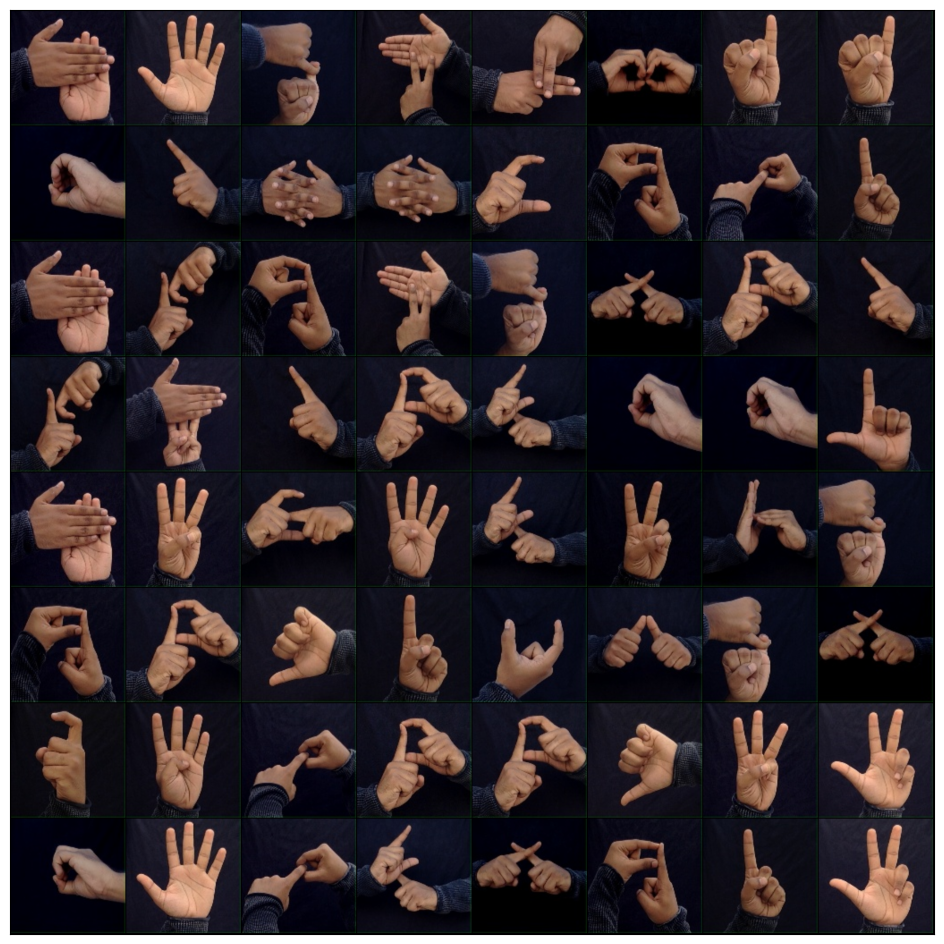

In [18]:
# Original Image
show_batch(train_dl, denorm=True)

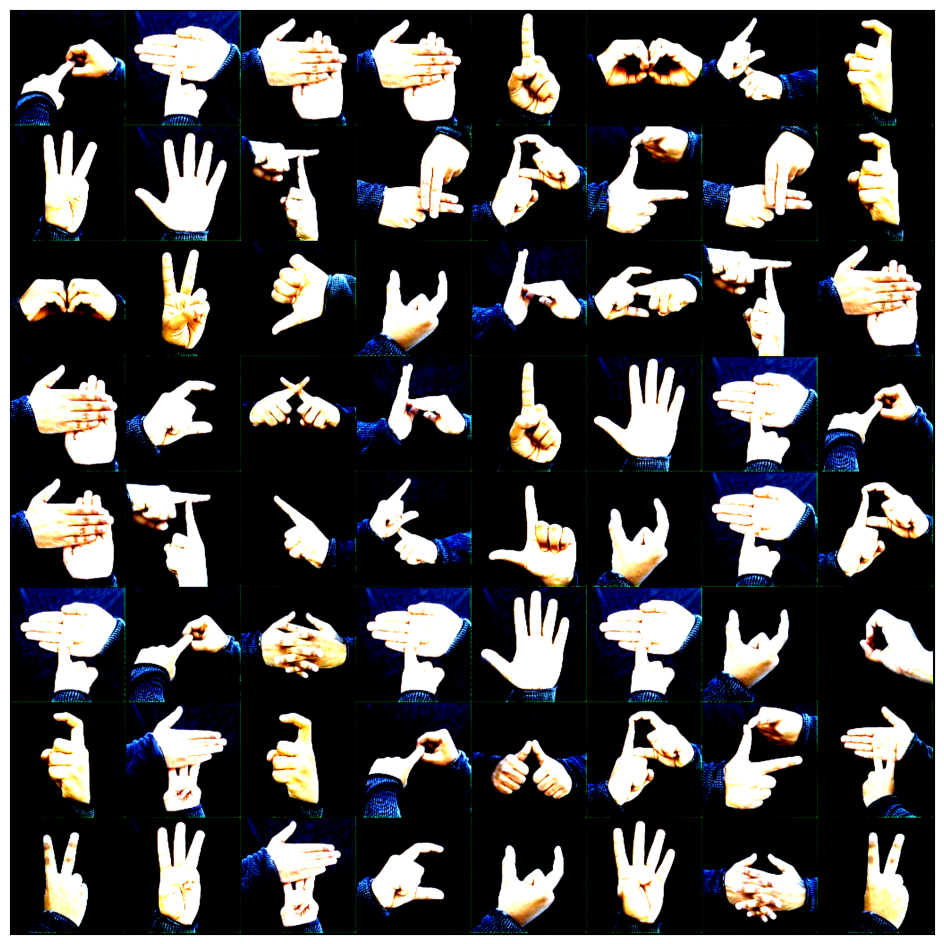

In [39]:
show_batch(valid_dl)

In [14]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [15]:
device = get_default_device()
device

device(type='cuda')

In [16]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [17]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [10]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = None
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample is not None:
            identity = self.downsample(x)
        out += identity
        out = self.relu(out)
        return out

# ResNet9 Model
class ResNet9(ImageClassificationBase):
    def __init__(self,in_channels, num_classes=35,dropout_prob =0.5):
        super(ResNet9, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self._make_layer(64, 64, stride=1,dropout_prob=dropout_prob)
        self.layer2 = self._make_layer(64, 128, stride=2,dropout_prob=dropout_prob)
        self.layer3 = self._make_layer(128, 256, stride=2,dropout_prob=dropout_prob)
        self.layer4 = self._make_layer(256, 512, stride=2,dropout_prob=dropout_prob)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, in_channels, out_channels, stride,dropout_prob):
        return nn.Sequential(
            ResidualBlock(in_channels, out_channels, stride=stride),
            nn.BatchNorm2d(out_channels),
            ResidualBlock(out_channels, out_channels, stride=1),
            nn.BatchNorm2d(out_channels),
            nn.Dropout(dropout_prob)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

In [11]:
model = ResNet9(3,35,0.5).to(device)
model

ResNet9(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps

In [18]:
!pip install thop


In [19]:
import torchvision.models as models
from thop import profile

# Load the pretrained ShuffleNet model
model = models.shufflenet_v2_x1_0(pretrained=True)

# Provide an example input size to the model
input_size = (1, 3, 226, 226)  # (batch_size, channels, height, width)
input_data = torch.randn(*input_size)

# Calculate FLOPs
flops, params = profile(model, inputs=(input_data,))
print("FLOPs:", flops)


[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FLOPs: 177995408.0


In [42]:
count=0
for i in model.parameters():
  count+= i.numel()
print(count)


11198307


In [26]:
!pip install torchsummary
from torchsummary import summary
summary(model=model, input_size=(3, 226, 226))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 113, 113]           9,408
       BatchNorm2d-2         [-1, 64, 113, 113]             128
              ReLU-3         [-1, 64, 113, 113]               0
         MaxPool2d-4           [-1, 64, 57, 57]               0
            Conv2d-5           [-1, 64, 57, 57]          36,864
       BatchNorm2d-6           [-1, 64, 57, 57]             128
              ReLU-7           [-1, 64, 57, 57]               0
            Conv2d-8           [-1, 64, 57, 57]          36,864
       BatchNorm2d-9           [-1, 64, 57, 57]             128
             ReLU-10           [-1, 64, 57, 57]               0
    ResidualBlock-11           [-1, 64, 57, 57]               0
      BatchNorm2d-12           [-1, 64, 57, 57]             128
           Conv2d-13           [-1, 64, 57, 57]          36,864
      BatchNorm2d-14           [-1, 64,

In [98]:
!pip install ptflops

In [18]:
class MobileNetV1(ImageClassificationBase):
    def __init__(self, input_channel, n_classes):
        super().__init__()
        def conv_bn(inp, oup, stride):
            return nn.Sequential(
                nn.Conv2d(inp, oup, 3, stride, 1, bias=False),
                nn.BatchNorm2d(oup),
                nn.ReLU(inplace=True)
                )
        def conv_dw(inp, oup, stride):
            return nn.Sequential(
                # depth wise
                nn.Conv2d(inp, inp, 3, stride, 1, groups=inp, bias=False),
                nn.BatchNorm2d(inp),
                nn.ReLU(inplace=True),
                #Point wise
                nn.Conv2d(inp, oup, 1, 1, 0, bias=False),
                nn.BatchNorm2d(oup),
                nn.ReLU(inplace=True),
                )
        self.model = nn.Sequential(
            conv_bn(input_channel, 32, 2),
            conv_dw(32, 64, 1),
            conv_dw(64, 128, 2),
            conv_dw(128, 128, 1),
            conv_dw(128, 256, 2),
            conv_dw(256, 256, 1),
            conv_dw(256, 512, 2),
            conv_dw(512, 512, 1),
            conv_dw(512, 512, 1),
            conv_dw(512, 512, 1),
            conv_dw(512, 512, 1),
            conv_dw(512, 512, 1),
            conv_dw(512, 1024, 2),
            conv_dw(1024, 1024, 1),
            nn.AvgPool2d(7)
        )
        self.fc = nn.Linear(1024, n_classes)

        self.model.apply(self.init_weights)
        self.fc.apply(self.init_weights)

    def init_weights(self, layer):
        if type(layer) == nn.Conv2d:
            nn.init.kaiming_normal_(layer.weight, mode='fan_out')
        if type(layer) == nn.Linear:
            nn.init.normal_(layer.weight, std=1e-3)
        if type(layer) == nn.BatchNorm2d:
            nn.init.constant_(layer.weight, 1)
            nn.init.constant_(layer.bias, 0)

    def forward(self, x):
        x = self.model(x)
        x = x.view(-1, 1024)
        x = self.fc(x)
        return x

In [19]:
mobilenet = to_device(MobileNetV1(3,target_num),device)
mobilenet

MobileNetV1(
  (model): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=64, bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 128, kernel_size=(1, 1

In [29]:
count=0
for i in mobilenet.parameters():
  count+= i.numel()
print(count)

3242851


In [ ]:
!pip install torchsummary

In [28]:
from torchsummary import summary
summary(model=mobilenet, input_size=(3, 226, 226))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 113, 113]             864
       BatchNorm2d-2         [-1, 32, 113, 113]              64
              ReLU-3         [-1, 32, 113, 113]               0
            Conv2d-4         [-1, 32, 113, 113]             288
       BatchNorm2d-5         [-1, 32, 113, 113]              64
              ReLU-6         [-1, 32, 113, 113]               0
            Conv2d-7         [-1, 64, 113, 113]           2,048
       BatchNorm2d-8         [-1, 64, 113, 113]             128
              ReLU-9         [-1, 64, 113, 113]               0
           Conv2d-10           [-1, 64, 57, 57]             576
      BatchNorm2d-11           [-1, 64, 57, 57]             128
             ReLU-12           [-1, 64, 57, 57]               0
           Conv2d-13          [-1, 128, 57, 57]           8,192
      BatchNorm2d-14          [-1, 128,

In [20]:
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def fit_one_cycle(epochs,learning_rate, model, train_loader, val_loader, 
                  weight_decay=0, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    optimizer = opt_func(model.parameters(), learning_rate, weight_decay=weight_decay)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            optimizer.step()
            optimizer.zero_grad()

        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [53]:
# history = [evaluate(model, valid_dl)]
# history

In [21]:
#new
history = [evaluate(model, valid_dl)]
history

NameError: name 'model' is not defined

In [45]:
epochs = 10
learning = 0.01
weight_decay = 1e-4
opt_func = torch.optim.SGD

In [ ]:
from torchvision.models import alexnet
from thop import profile

model = alexnet()
input = torch.randn(1, 3, 224, 224)
macs, params = profile(model, inputs=(input, ))

In [48]:
%%time 
history += fit_one_cycle(epochs, learning, model, train_dl, valid_dl,  
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], train_loss: 0.0027, val_loss: 0.2427, val_acc: 0.9306
Epoch [1], train_loss: 0.0022, val_loss: 0.3277, val_acc: 0.9062
Epoch [2], train_loss: 0.0019, val_loss: 0.3412, val_acc: 0.9005
Epoch [3], train_loss: 0.0022, val_loss: 0.4392, val_acc: 0.8858
Epoch [4], train_loss: 0.0019, val_loss: 0.2564, val_acc: 0.9300
Epoch [5], train_loss: 0.0017, val_loss: 0.3078, val_acc: 0.9138
Epoch [6], train_loss: 0.0017, val_loss: 0.2590, val_acc: 0.9319
Epoch [7], train_loss: 0.0016, val_loss: 0.2179, val_acc: 0.9335
Epoch [8], train_loss: 0.0015, val_loss: 0.2729, val_acc: 0.9103
Epoch [9], train_loss: 0.0017, val_loss: 0.1957, val_acc: 0.9486
CPU times: user 11min 54s, sys: 9min 10s, total: 21min 5s
Wall time: 19min 54s


In [15]:
#For resnet9
from torchprofile import profile_macs
inp = torch.randn(1, 3, 226, 226).to(device)
flops = profile_macs(model,inp )
print("Total FLOPS:", flops)

Total FLOPS: 2052340992


In [20]:
#for mobilenetv1
from torchprofile import profile_macs
mobilenet = MobileNetV1(3,35).to(device)
inp = torch.randn(1, 3, 226, 226).to(device)
flops = profile_macs(mobilenet,inp )
print("Total FLOPS:", flops)

Total FLOPS: 648990848


In [21]:
#for efficientNet
from torchprofile import profile_macs
!pip install efficientnet_pytorch
from efficientnet_pytorch import EfficientNet

efficientnet_model = EfficientNet.from_pretrained('efficientnet-b0')

num_classes = 35 
efficientnet_model._fc = torch.nn.Linear(efficientnet_model._fc.in_features, num_classes)
efficientnet_model.to(device)
inp = torch.randn(1, 3, 226, 226).to(device)
flops = profile_macs(efficientnet_model,inp )
print("Total FLOPS:", flops)

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=57efc394c88893559939fb79bf98511d495cbf466af6b07e76e0d348e693edb7
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 150MB/s] 


Loaded pretrained weights for efficientnet-b0
Total FLOPS: 394610928


/opt/conda/lib/python3.10/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::pad". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(
/opt/conda/lib/python3.10/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "prim::pythonop". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(
/opt/conda/lib/python3.10/site-packages/torchprofile/profile.py:22: UserWarning: No handlers found: "aten::rand". Skipped.
  warnings.warn('No handlers found: "{}". Skipped.'.format(


In [23]:
#shufflenet
from torchprofile import profile_macs
shufflenet_model = torchvision.models.shufflenet_v2_x1_0(pretrained=True)
num_ftrs = shufflenet_model.fc.in_features
shufflenet_model.fc = nn.Linear(num_ftrs, 35) # Assuming num_classes is defined

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(shufflenet_model.parameters(), lr=0.01)
shufflenet_model = shufflenet_model.to(device)
inp = torch.randn(1, 3, 226, 226).to(device)
flops = profile_macs(shufflenet_model,inp )
print("Total FLOPS:", flops)

Total FLOPS: 170524570


In [51]:
# %%time
# history += fit_one_cycle(epochs, learning, model, train_dl, valid_dl,  
#                              weight_decay=weight_decay, 
#                              opt_func=opt_func)

Epoch [0], train_loss: 1.9643, val_loss: 3.9409, val_acc: 0.1793
Epoch [1], train_loss: 0.2459, val_loss: 2.0010, val_acc: 0.4342
Epoch [2], train_loss: 0.0698, val_loss: 3.5697, val_acc: 0.4975
Epoch [3], train_loss: 0.0356, val_loss: 2.6807, val_acc: 0.4049
Epoch [4], train_loss: 0.0231, val_loss: 0.7736, val_acc: 0.7261
Epoch [5], train_loss: 0.0155, val_loss: 1.3947, val_acc: 0.5845
Epoch [6], train_loss: 0.0128, val_loss: 5.3672, val_acc: 0.2273
Epoch [7], train_loss: 0.0136, val_loss: 0.6509, val_acc: 0.8382
Epoch [8], train_loss: 0.0104, val_loss: 1.3283, val_acc: 0.7062
Epoch [9], train_loss: 0.0075, val_loss: 0.3396, val_acc: 0.8823
CPU times: user 11min 16s, sys: 8min 20s, total: 19min 37s
Wall time: 18min 44s


In [26]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

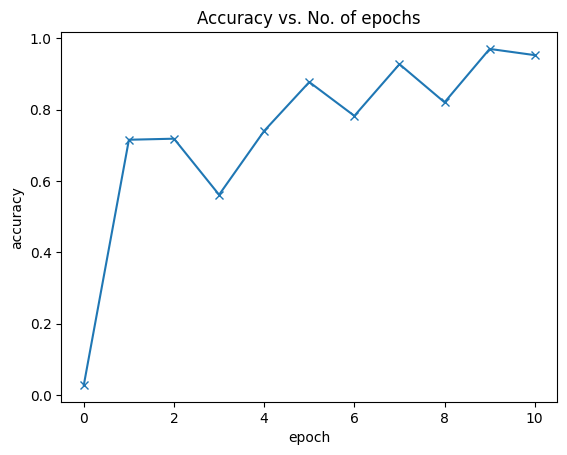

In [35]:
plot_accuracies(history)#with new

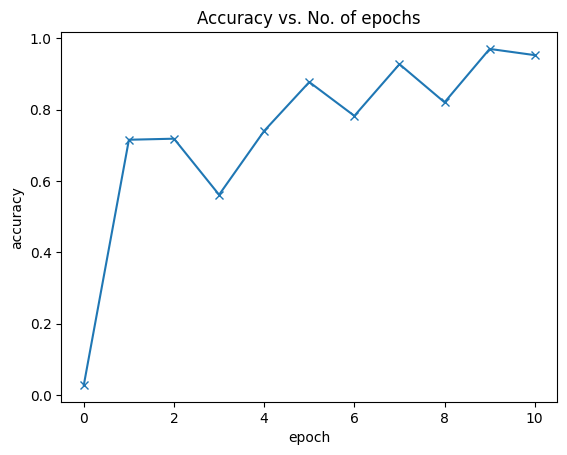

In [36]:
plot_accuracies(history)

In [27]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

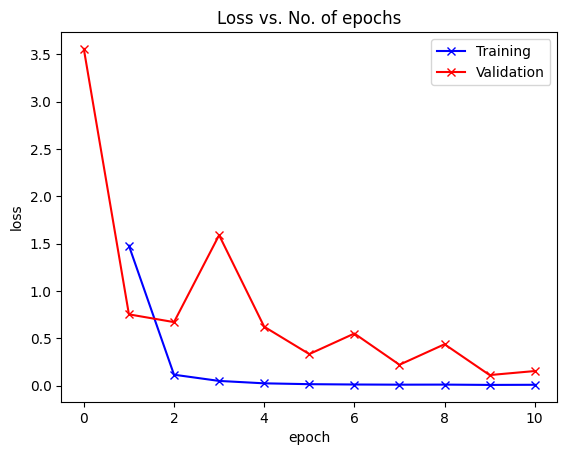

In [38]:
plot_losses(history)#with new

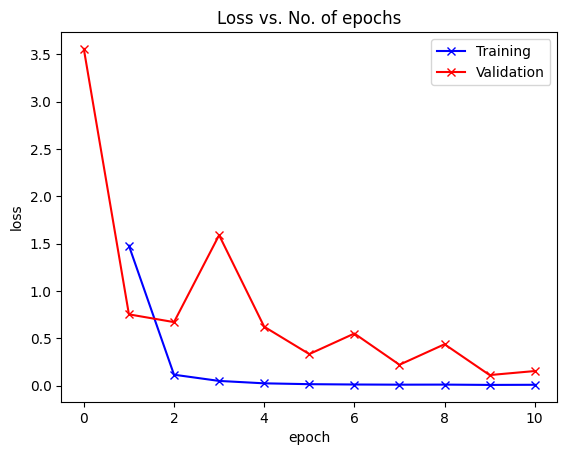

In [39]:
plot_losses(history)

In [40]:
#with new
correct = []
total = 0

# Set model to evaluation mode
model.eval()

# Disable gradient computation
with torch.no_grad():
    for img, lab in test_data:
        # Move data to device
        xb = to_device(img.unsqueeze(0), device)
        # Get predictions from model
        yb = model(xb)
        _, preds = torch.max(yb, dim=1)
        # Check if prediction matches the label
        correct.append(preds[0].item() == lab)
        total += 1

# Compute accuracy
accuracy = sum(correct) / total * 100
print(f"Accuracy [Test Data]: {accuracy:.2f}%")

Accuracy [Test Data]: 94.88%


In [41]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_data.classes[preds[0].item()]

In [42]:
correct = [] 
for i in test_idx:
    img, lab = test_data[i]
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    correct.append(preds[0].item() == lab)
print(f"Accuracy [Test Data]: {sum(correct) / len(test_idx) * 100} %")

NameError: name 'test_idx' is not defined

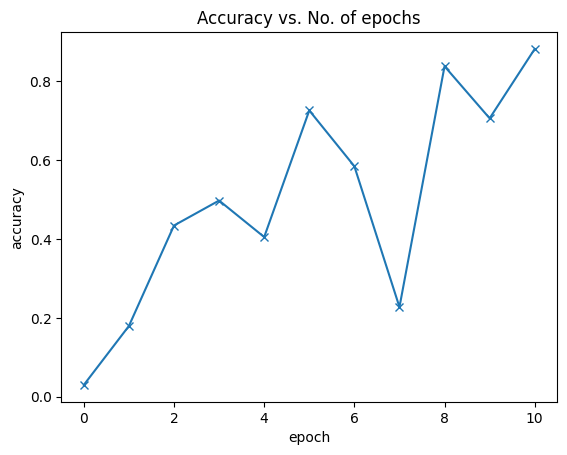

In [59]:
plot_accuracies(history)

In [43]:
#new
def predict_image(img, model, class_labels):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label using class_labels
    return class_labels[preds[0].item()]

# Usage:
# plot_images(test_data, full_data, model, class_labels=full_data.classes)


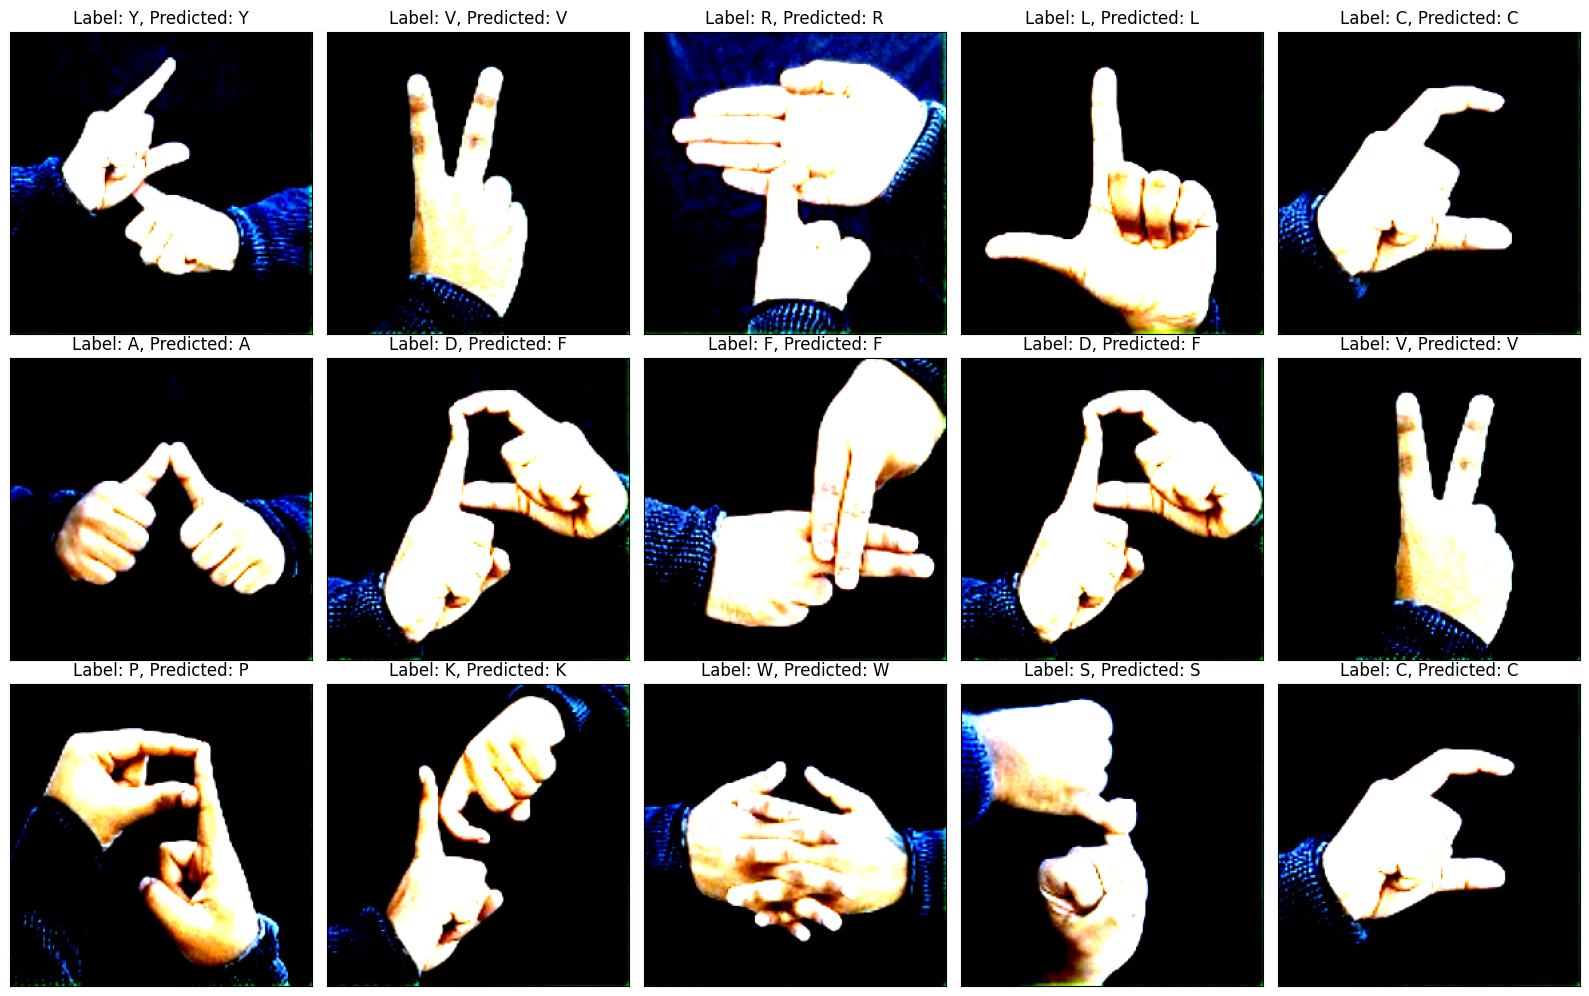

In [44]:
#new
import matplotlib.pyplot as plt

def plot_images(test_data, full_data, model, n_images=15):
    fig = plt.figure(figsize=(16, 10))
    iterator = iter(test_data)
    for i in range(1, n_images + 1):
        img, label = next(iterator)
        ax = fig.add_subplot(3, 5, i)
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(img.permute(1, 2, 0).clamp(0, 1))
        
        # Obtain true label using the original full_data dataset
        true_label = full_data.classes[label]
        
        predicted_label = predict_image(img, model,full_data.classes)
        ax.set_title(f"Label: {true_label}, Predicted: {predicted_label}")
    plt.tight_layout()
    plt.show()

# Visualize some images from the test data
plot_images(test_data, full_data, model)


In [ ]:
# plot_los

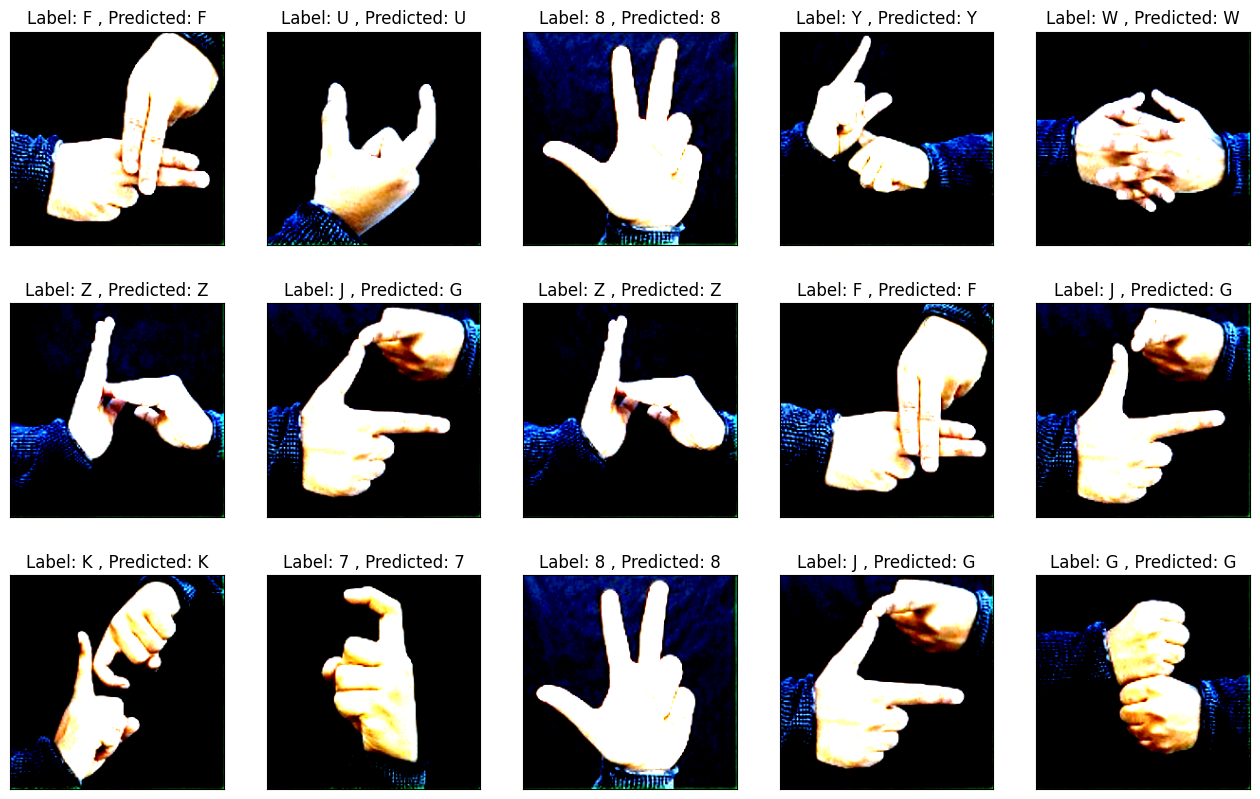

In [60]:
# n_rows, n_cols, i = 3, 5, 1
# fig = plt.figure(figsize=(16,10))
# for index in test_idx[:15]:
#     img, label = test_data[index]
#     ax = fig.add_subplot(n_rows, n_cols, i)
#     ax.set_xticks([]); ax.set_yticks([])
#     ax.imshow(img.permute(1, 2, 0).clamp(0,1))
#     ax.set_title(f"Label: {test_data.classes[label]} , Predicted: {predict_image(img, model)}")
#     i+=1

In [19]:
import torch
torch.save(model.state_dict(), '/kaggle/working/Resnet9.pth')

In [20]:
import joblib
filename = 'Resnet9.sav'
joblib.dump(model, filename)

['Resnet9.sav']

In [22]:
mobilenet = to_device(MobileNetV1(3,target_num),device)
mobilenet

MobileNetV1(
  (model): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=64, bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 128, kernel_size=(1, 1

In [55]:
# history = [evaluate(mobilenet, valid_dl)]
# history

In [23]:
#new
history = [evaluate(mobilenet, valid_dl)]
history


[{'val_loss': 3.555341958999634, 'val_acc': 0.02713068202137947}]

In [24]:
epochs = 10
learning = 0.01
weight_decay = 1e-4
opt_func = torch.optim.SGD

In [64]:
# %%time
# history += fit_one_cycle(epochs, learning, mobilenet, train_dl, valid_dl,  
#                              weight_decay=weight_decay, 
#                              opt_func=opt_func)

Epoch [0], train_loss: 2.9637, val_loss: 2.2699, val_acc: 0.2998
Epoch [1], train_loss: 1.2358, val_loss: 0.8077, val_acc: 0.7880
Epoch [2], train_loss: 0.1990, val_loss: 0.2422, val_acc: 0.9557
Epoch [3], train_loss: 0.0530, val_loss: 0.0183, val_acc: 0.9997
Epoch [4], train_loss: 0.0301, val_loss: 0.7197, val_acc: 0.8618
Epoch [5], train_loss: 0.0197, val_loss: 0.0104, val_acc: 1.0000
Epoch [6], train_loss: 0.0131, val_loss: 0.0053, val_acc: 0.9998
Epoch [7], train_loss: 0.0106, val_loss: 0.0042, val_acc: 1.0000
Epoch [9], train_loss: 0.0082, val_loss: 0.0082, val_acc: 1.0000
CPU times: user 11min 38s, sys: 8min 45s, total: 20min 24s
Wall time: 19min 35s


In [25]:
%%time 
history += fit_one_cycle(epochs, learning, mobilenet, train_dl, valid_dl,  
                             weight_decay=weight_decay, 
                             opt_func=opt_func)
#new

Epoch [0], train_loss: 2.8386, val_loss: 1.7497, val_acc: 0.5165
Epoch [1], train_loss: 0.8019, val_loss: 0.2095, val_acc: 0.9938
Epoch [2], train_loss: 0.0901, val_loss: 0.0200, val_acc: 1.0000
Epoch [3], train_loss: 0.0302, val_loss: 0.0080, val_acc: 1.0000
Epoch [4], train_loss: 0.0179, val_loss: 0.0082, val_acc: 1.0000
Epoch [5], train_loss: 0.0124, val_loss: 0.0033, val_acc: 1.0000
Epoch [6], train_loss: 0.0090, val_loss: 0.0024, val_acc: 1.0000
Epoch [7], train_loss: 0.0075, val_loss: 0.0018, val_acc: 1.0000
Epoch [8], train_loss: 0.0062, val_loss: 0.0014, val_acc: 1.0000
Epoch [9], train_loss: 0.0055, val_loss: 0.0012, val_acc: 1.0000
CPU times: user 12min 7s, sys: 9min 19s, total: 21min 26s
Wall time: 20min 48s


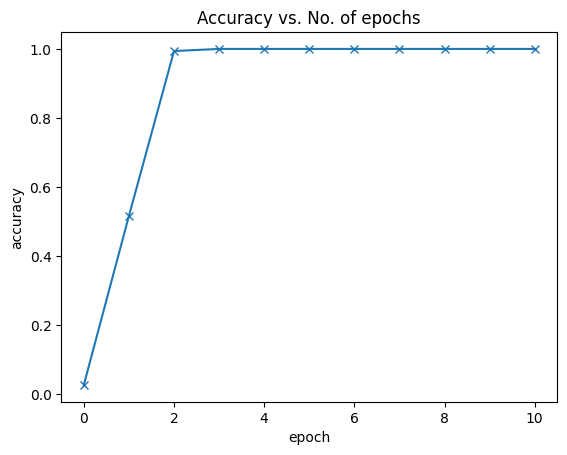

In [29]:
plot_accuracies(history)

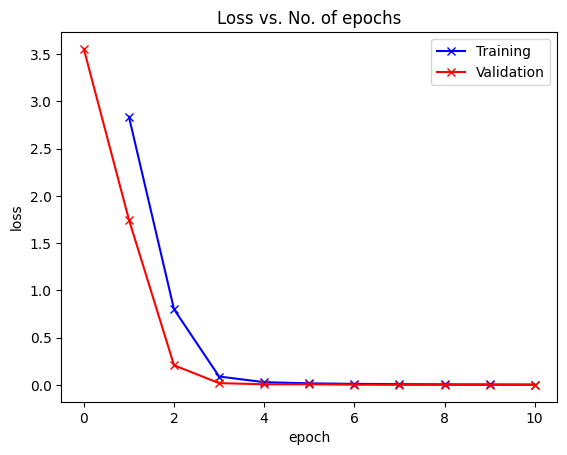

In [28]:
plot_losses(history)

In [65]:
correct = [] 
for i in test_idx:
    img, lab = test_data[i]
    xb = to_device(img.unsqueeze(0), device)
    yb = mobilenet(xb)
    _, preds  = torch.max(yb, dim=1)
    correct.append(preds[0].item() == lab)
print(f"Accuracy [Test Data]: {sum(correct) / len(test_idx) * 100} %")

Accuracy [Test Data]: 100.0 %


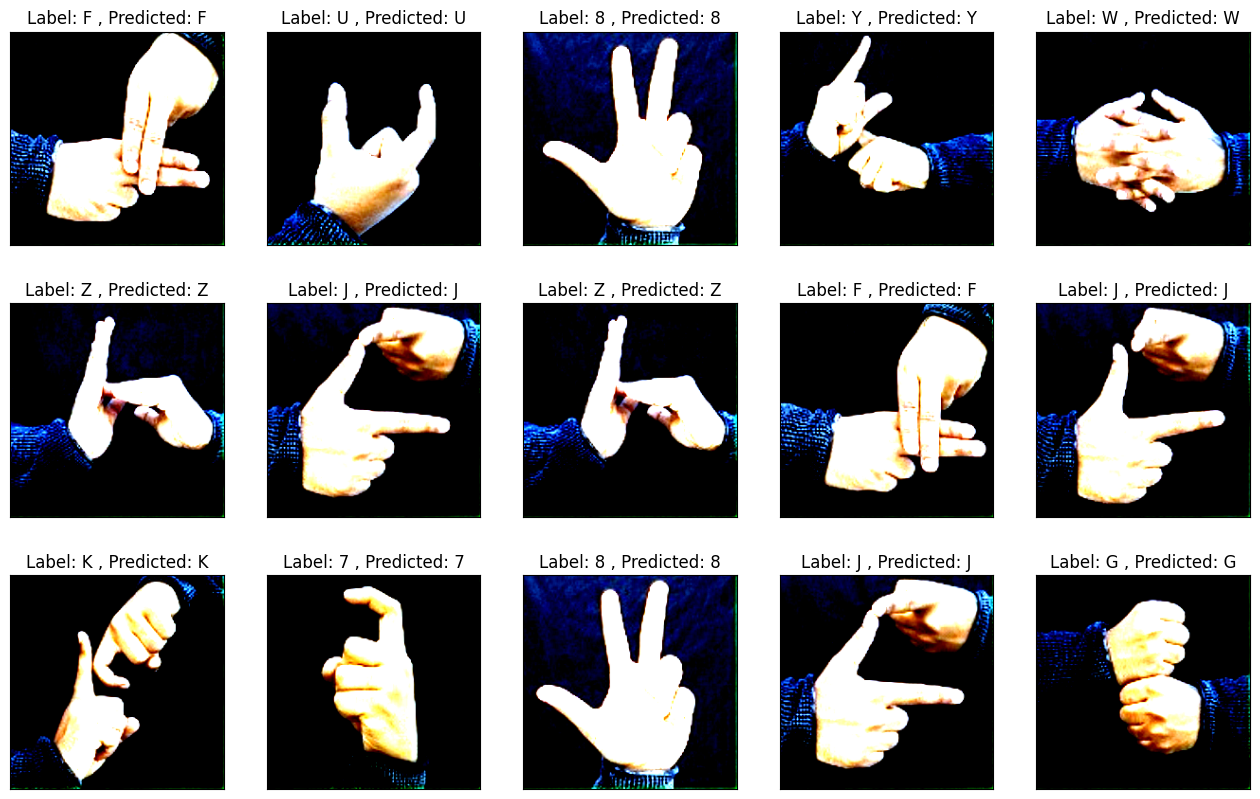

In [66]:
n_rows, n_cols, i = 3, 5, 1
fig = plt.figure(figsize=(16,10))
for index in test_idx[:15]:
    img, label = test_data[index]
    ax = fig.add_subplot(n_rows, n_cols, i)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img.permute(1, 2, 0).clamp(0,1))
    ax.set_title(f"Label: {test_data.classes[label]} , Predicted: {predict_image(img, mobilenet)}")
    i+=1

In [69]:
torch.save(mobilenet.state_dict(), '/kaggle/working/mobilenet.pth')

In [87]:
history = [evaluate(mobilenet, valid_dl)]
history

TypeError: 'numpy.float64' object is not callable

In [70]:
import joblib
filename = 'mobilenet.sav'
joblib.dump(mobilenet, filename)

['mobilenet.sav']

In [46]:
efficientnet = torchvision.models.efficientnet_b0(pretrained =True)

In [47]:
for param in efficientnet.parameters():  #freezing the weights 
    param.requires_grad = False

In [52]:
num_features = efficientnet.classifier[-1].in_features

In [53]:
efficientnet.classifier[-1] = nn.Linear(num_features,target_num)

In [68]:
epochs = 10
learning = 0.01
weight_decay = 1e-4
opt_func = torch.optim.SGD

In [50]:
def evaluate(model, val_loader,batch_size):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    criterion = nn.CrossEntropyLoss()
    criterion = criterion.to(device)
    num_samples = len(val_loader) * val_loader.batch_size
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_loss /= num_samples
    val_acc = correct / num_samples
    return {'val_loss': val_loss, 'val_acc': val_acc}

# Define the training function
def fit_one_cycle(epochs, learning_rate, model, train_loader, val_loader, 
                  weight_decay=0, opt_func=torch.optim.SGD, device='cuda'):
    torch.cuda.empty_cache()
    history = {'train_loss': [], 'val_loss': [], 'val_acc': []}
    
    optimizer = opt_func(model.parameters(), learning_rate, weight_decay=weight_decay)
    criterion = nn.CrossEntropyLoss()
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())

        # Validation phase
        val_result = evaluate(model, val_loader, criterion, device=device)
        history['train_loss'].append(np.mean(train_losses))
        history['val_loss'].append(val_result['val_loss'])
        history['val_acc'].append(val_result['val_acc'])
        
        print("Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f}, Val Acc: {:.4f}".format(
            epoch+1, epochs, history['train_loss'][-1], history['val_loss'][-1], history['val_acc'][-1]))
        
    return history

In [84]:
history = [evaluate(efficientnet.to(device), valid_dl,batch_size)]
history

AttributeError: 'DeviceDataLoader' object has no attribute 'batch_size'

MobileNetV1(
  (model): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=64, bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 128, kernel_size=(1, 1

In [29]:
!pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=cc4410226ab0cc770a852481ced6639213d6574ba59d5e459c60e1261c3bb5fd
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 150MB/s] 


Loaded pretrained weights for efficientnet-b0
Epoch [1/10], Train Loss: 1.7764
Validation Loss: 0.5348, Validation Accuracy: 1.0000
Epoch [2/10], Train Loss: 0.4521
Validation Loss: 0.1677, Validation Accuracy: 1.0000
Epoch [3/10], Train Loss: 0.2203
Validation Loss: 0.0887, Validation Accuracy: 1.0000
Epoch [4/10], Train Loss: 0.1439
Validation Loss: 0.0585, Validation Accuracy: 1.0000
Epoch [5/10], Train Loss: 0.1073
Validation Loss: 0.0425, Validation Accuracy: 1.0000
Epoch [6/10], Train Loss: 0.0844
Validation Loss: 0.0332, Validation Accuracy: 1.0000
Epoch [7/10], Train Loss: 0.0706
Validation Loss: 0.0270, Validation Accuracy: 1.0000
Epoch [8/10], Train Loss: 0.0609
Validation Loss: 0.0228, Validation Accuracy: 1.0000
Epoch [9/10], Train Loss: 0.0534
Validation Loss: 0.0197, Validation Accuracy: 1.0000
Epoch [10/10], Train Loss: 0.0473
Validation Loss: 0.0173, Validation Accuracy: 1.0000


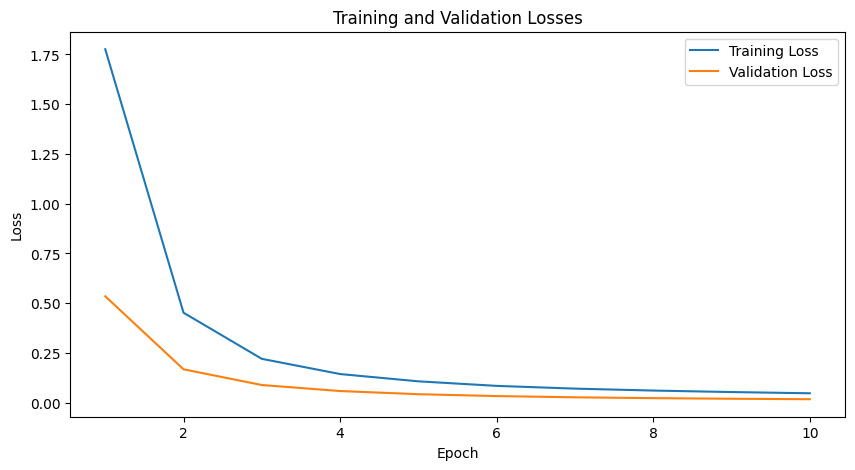

In [30]:
from efficientnet_pytorch import EfficientNet
efficientnet_model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=35)  # 35 classes for sign language
efficientnet_model = efficientnet_model.to(device)
for param in efficientnet_model.parameters():
    param.requires_grad = False
for param in efficientnet_model._fc.parameters():
    param.requires_grad = True

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)
optimizer = torch.optim.SGD(efficientnet_model.parameters(), lr=0.01,weight_decay=1e-4)
train_losses = []
valid_losses = []
num_epochs =10
for epoch in range(num_epochs):
    efficientnet_model.train()
    running_train_loss = 0.0
    for inputs, labels in train_dl:
        optimizer.zero_grad()
        outputs = efficientnet_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item() * inputs.size(0)
    epoch_train_loss = running_train_loss / len(train_data)
    train_losses.append(epoch_train_loss)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}")

    # Evaluate the model on validation set
    efficientnet_model.eval()
    running_valid_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in valid_dl:
            outputs = efficientnet_model(inputs)
            loss = criterion(outputs, labels)
            running_valid_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    epoch_valid_loss = running_valid_loss / len(valid_data)
    valid_losses.append(epoch_valid_loss)
    val_accuracy = correct / total
    print(f"Validation Loss: {epoch_valid_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Plotting the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()


In [108]:
correct = [] 
for i in test_idx:
    img, lab = test_data[i]
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    correct.append(preds[0].item() == lab)
print(f"Accuracy [Test Data]: {sum(correct) / len(test_idx) * 100} %")

Accuracy [Test Data]: 100.0 %


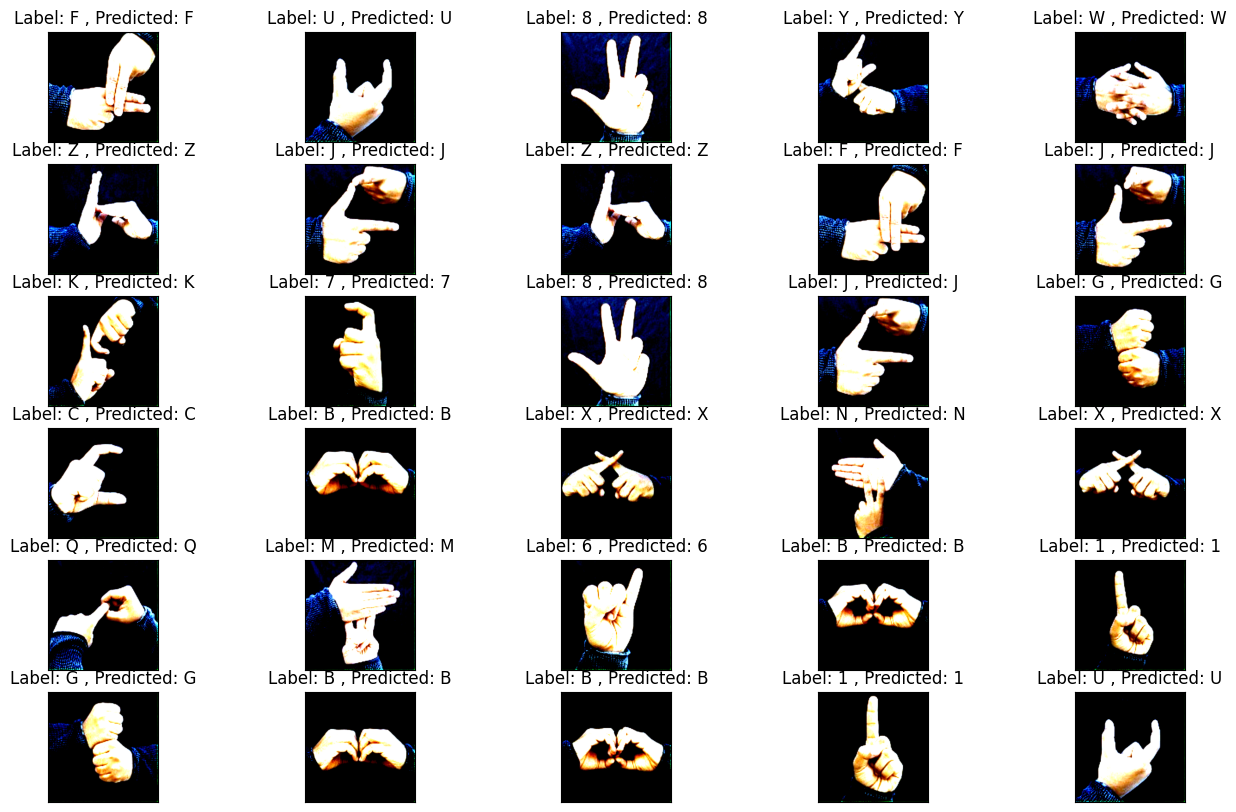

In [115]:
n_rows, n_cols, i = 6, 5, 1
fig = plt.figure(figsize=(16,10))
for index in test_idx[:30]:
    img, label = test_data[index]
    ax = fig.add_subplot(n_rows, n_cols, i)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img.permute(1, 2, 0).clamp(0,1))
    ax.set_title(f"Label: {test_data.classes[label]} , Predicted: {predict_image(img, model)}")
    i+=1

In [34]:
epochs = 10
learning = 0.01
weight_decay = 1e-4
opt_func = torch.optim.SGD

In [36]:
history = fit_one_cycle(epochs, learning,shufflenet_pretrained, train_dl, valid_dl, opt_func)

TypeError: '<' not supported between instances of 'type' and 'float'

In [47]:
shufflenet_model = torchvision.models.shufflenet_v2_x1_0(pretrained=True)
num_ftrs = shufflenet_model.fc.in_features
shufflenet_model.fc = nn.Linear(num_ftrs, target_num) # Assuming num_classes is defined

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(shufflenet_model.parameters(), lr=0.01)
shufflenet_model = shufflenet_model.to(device)
# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    shufflenet_model.train()
    running_loss = 0.0
    for inputs, labels in train_dl:
        optimizer.zero_grad()
        outputs = shufflenet_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_data)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {epoch_loss:.4f}")

    # Evaluate the model
    shufflenet_model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in valid_dl:
            outputs = shufflenet_model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_accuracy = correct / total
    print(f"Validation Accuracy: {val_accuracy:.4f}")

print('Finished Training')

Epoch [1/10], Train Loss: 2.6598
Validation Accuracy: 0.1338
Epoch [2/10], Train Loss: 2.6441
Validation Accuracy: 0.4940
Epoch [3/10], Train Loss: 2.6231
Validation Accuracy: 0.7500
Epoch [4/10], Train Loss: 2.5909
Validation Accuracy: 0.8724
Epoch [5/10], Train Loss: 2.5350
Validation Accuracy: 0.8697
Epoch [6/10], Train Loss: 2.4332
Validation Accuracy: 0.8662
Epoch [7/10], Train Loss: 2.2808
Validation Accuracy: 0.9260
Epoch [8/10], Train Loss: 2.0755
Validation Accuracy: 0.8954
Epoch [9/10], Train Loss: 1.8237
Validation Accuracy: 0.8276
Epoch [10/10], Train Loss: 1.5008
Validation Accuracy: 0.8068
Finished Training


Epoch [1/10], Train Loss: 3.5423
Validation Loss: 3.5287, Validation Accuracy: 0.1590
Epoch [2/10], Train Loss: 3.5140
Validation Loss: 3.4956, Validation Accuracy: 0.6140
Epoch [3/10], Train Loss: 3.4751
Validation Loss: 3.4475, Validation Accuracy: 0.8719
Epoch [4/10], Train Loss: 3.4141
Validation Loss: 3.3655, Validation Accuracy: 0.9457
Epoch [5/10], Train Loss: 3.3069
Validation Loss: 3.2121, Validation Accuracy: 0.9336
Epoch [6/10], Train Loss: 3.1051
Validation Loss: 2.9218, Validation Accuracy: 0.8693
Epoch [7/10], Train Loss: 2.7815
Validation Loss: 2.5298, Validation Accuracy: 0.8124
Epoch [8/10], Train Loss: 2.3295
Validation Loss: 1.9791, Validation Accuracy: 0.8276
Epoch [9/10], Train Loss: 1.7636
Validation Loss: 1.3823, Validation Accuracy: 0.9014
Epoch [10/10], Train Loss: 1.1506
Validation Loss: 0.7694, Validation Accuracy: 0.9924


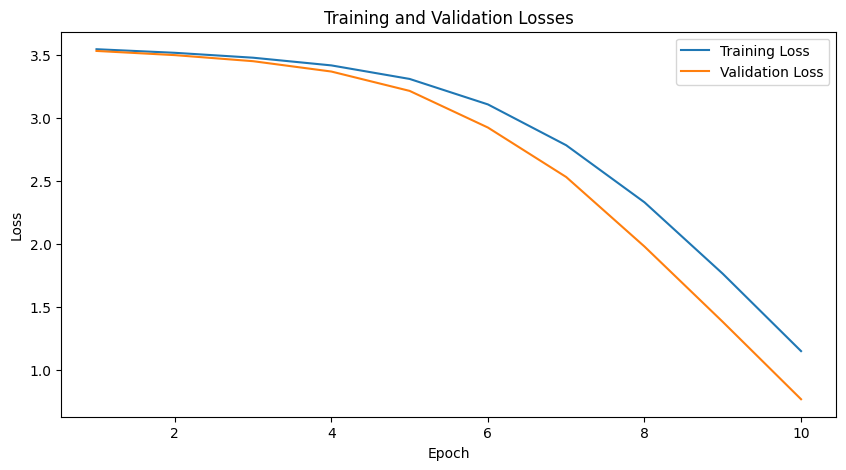

In [62]:
shufflenet_model = torchvision.models.shufflenet_v2_x1_0(pretrained=True)
num_ftrs = shufflenet_model.fc.in_features
shufflenet_model.fc = nn.Linear(num_ftrs, target_num) # Assuming num_classes is defined

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(shufflenet_model.parameters(), lr=0.01)
shufflenet_model = shufflenet_model.to(device)
train_losses = []
valid_losses = []
num_epochs =10
for epoch in range(num_epochs):
    shufflenet_model.train()
    running_train_loss = 0.0
    for inputs, labels in train_dl:
        optimizer.zero_grad()
        outputs = shufflenet_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item() * inputs.size(0)
    epoch_train_loss = running_train_loss / len(train_data)
    train_losses.append(epoch_train_loss)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}")

    # Evaluate the model on validation set
    shufflenet_model.eval()
    running_valid_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in valid_dl:
            outputs = shufflenet_model(inputs)
            loss = criterion(outputs, labels)
            running_valid_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    epoch_valid_loss = running_valid_loss / len(valid_data)
    valid_losses.append(epoch_valid_loss)
    val_accuracy = correct / total
    print(f"Validation Loss: {epoch_valid_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Plotting the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()


In [31]:
shufflenet_model = torchvision.models.shufflenet_v2_x1_0(pretrained=True)
num_ftrs = shufflenet_model.fc.in_features
shufflenet_model.fc = nn.Linear(num_ftrs, target_num) # Assuming num_classes is defined

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(shufflenet_model.parameters(), lr=0.01)
shufflenet_model = shufflenet_model.to(device)
summary(model=shufflenet_model, input_size=(3, 226, 226))

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to /root/.cache/torch/hub/checkpoints/shufflenetv2_x1-5666bf0f80.pth
100%|██████████| 8.79M/8.79M [00:00<00:00, 83.1MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 24, 113, 113]             648
       BatchNorm2d-2         [-1, 24, 113, 113]              48
              ReLU-3         [-1, 24, 113, 113]               0
         MaxPool2d-4           [-1, 24, 57, 57]               0
            Conv2d-5           [-1, 24, 29, 29]             216
       BatchNorm2d-6           [-1, 24, 29, 29]              48
            Conv2d-7           [-1, 58, 29, 29]           1,392
       BatchNorm2d-8           [-1, 58, 29, 29]             116
              ReLU-9           [-1, 58, 29, 29]               0
           Conv2d-10           [-1, 58, 57, 57]           1,392
      BatchNorm2d-11           [-1, 58, 57, 57]             116
             ReLU-12           [-1, 58, 57, 57]               0
           Conv2d-13           [-1, 58, 29, 29]             522
      BatchNorm2d-14           [-1, 58,

In [1]:
test_dl = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)
test_dl = DeviceDataLoader(test_dl,device)
# Put the model in evaluation mode
shufflenet_model.to(device)
shufflenet_model.eval()

# Lists to store predictions and true labels
all_predictions = []
all_labels = []

# Iterate over the test dataset
with torch.no_grad():
    for inputs, labels in test_dl:
        # Forward pass
        outputs = shufflenet_model(inputs)
        # Get predictions
        _, predicted = torch.max(outputs, 1)
        # Append predictions and true labels to lists
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert predictions and labels to numpy arrays
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

# Calculate accuracy
accuracy = (all_predictions == all_labels).mean()
print(f"Test Accuracy: {accuracy:.4f}")

NameError: name 'torch' is not defined

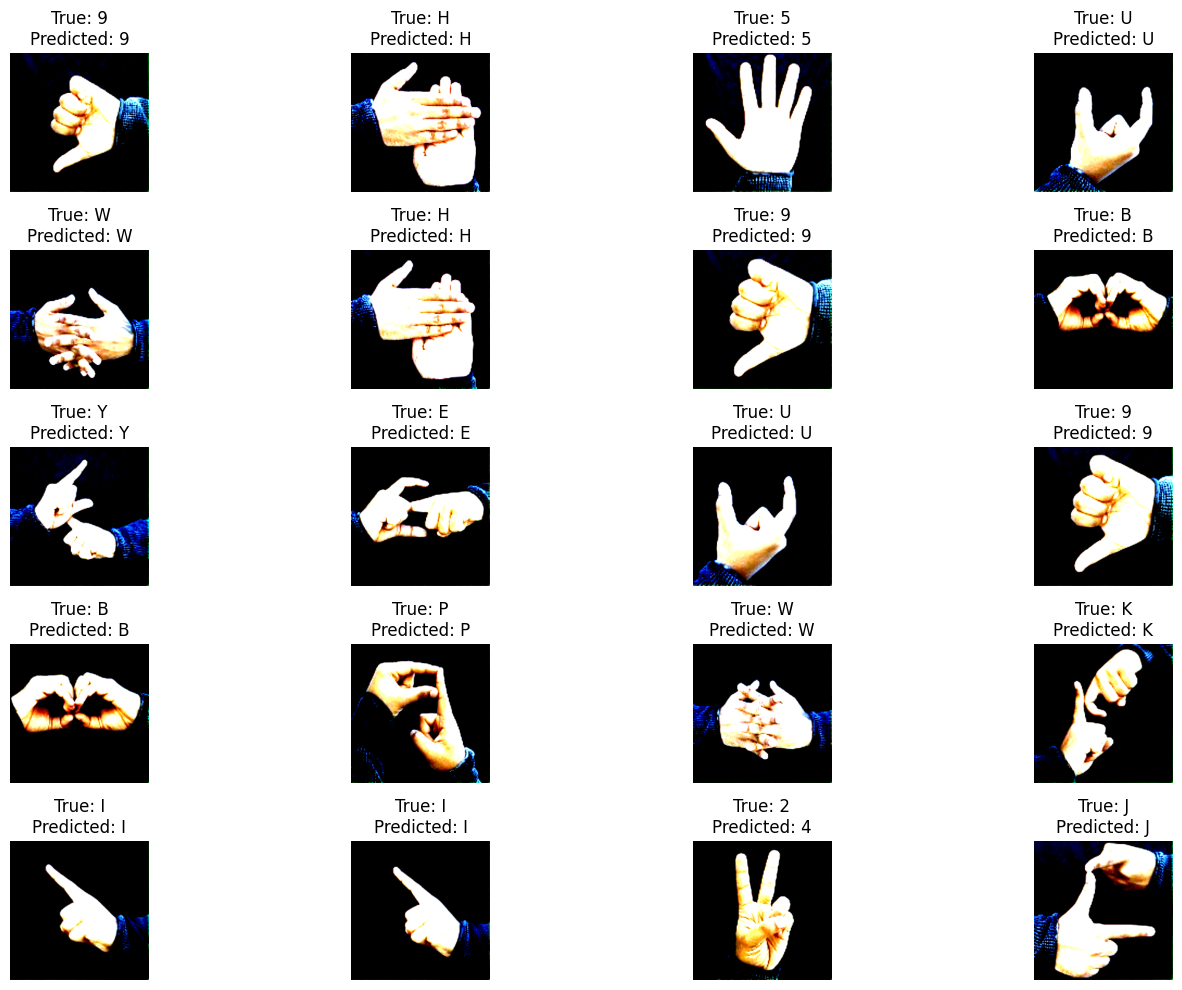

In [82]:
import random
import matplotlib.pyplot as plt

def plot_images_with_predictions(test_dl, shufflenet_model, class_labels, num_rows=3, num_cols=5):
    shufflenet_model.eval()
    
    # Get the underlying DataLoader from the DeviceDataLoader
    underlying_dl = test_dl.dl
    
    # Shuffling the indices of the underlying DataLoader's dataset
    underlying_dl.dataset.dataset.indices = list(range(len(underlying_dl.dataset.dataset)))
    random.shuffle(underlying_dl.dataset.dataset.indices)
    
    iterator = iter(test_dl)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
    for row in range(num_rows):
        for col in range(num_cols):
            try:
                inputs, labels = next(iterator)
            except StopIteration:
                return
            outputs = shufflenet_model(inputs)
            _, predicted = torch.max(outputs, 1)
            img = inputs[0].cpu()
            true_label = class_labels[labels[0]]
            predicted_label = class_labels[predicted[0]]
            axes[row, col].imshow(img.permute(1, 2, 0).clamp(0, 1))
            axes[row, col].set_title(f"True: {true_label}\nPredicted: {predicted_label}")
            axes[row, col].axis('off')
    plt.tight_layout()
    plt.show()

# Usage to visualize predictions on test data:
plot_images_with_predictions(test_dl, shufflenet_model, full_data.classes, num_rows=5, num_cols=4)


Loaded pretrained weights for efficientnet-b0
Epoch [1/10], Train Loss: 1.0469
Validation Loss: 0.0484, Validation Accuracy: 1.0000
Epoch [2/10], Train Loss: 0.0596
Validation Loss: 0.0138, Validation Accuracy: 1.0000
Epoch [3/10], Train Loss: 0.0257
Validation Loss: 0.0069, Validation Accuracy: 1.0000
Epoch [4/10], Train Loss: 0.0159
Validation Loss: 0.0045, Validation Accuracy: 1.0000
Epoch [5/10], Train Loss: 0.0115
Validation Loss: 0.0033, Validation Accuracy: 1.0000
Epoch [6/10], Train Loss: 0.0088
Validation Loss: 0.0025, Validation Accuracy: 1.0000
Epoch [7/10], Train Loss: 0.0072
Validation Loss: 0.0020, Validation Accuracy: 1.0000
Epoch [8/10], Train Loss: 0.0060
Validation Loss: 0.0017, Validation Accuracy: 1.0000
Epoch [9/10], Train Loss: 0.0051
Validation Loss: 0.0014, Validation Accuracy: 1.0000
Epoch [10/10], Train Loss: 0.0044
Validation Loss: 0.0013, Validation Accuracy: 1.0000


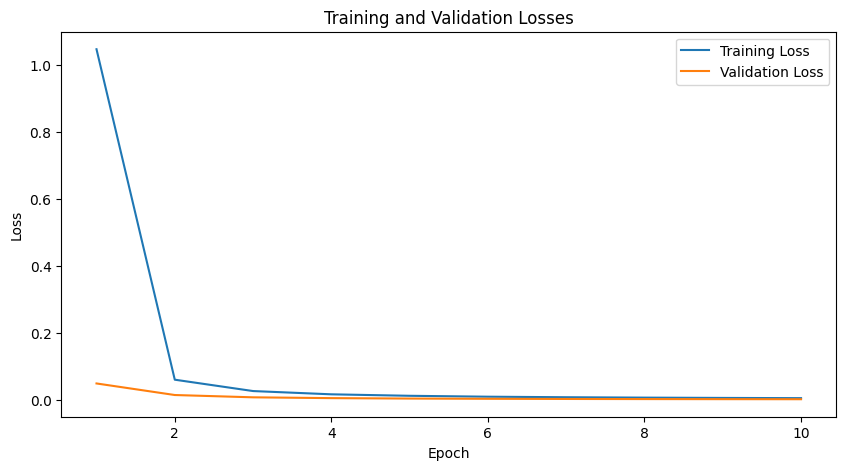

In [36]:
# Load pretrained EfficientNet model
efficientnet_model = EfficientNet.from_pretrained('efficientnet-b0')
num_ftrs = efficientnet_model._fc.in_features
efficientnet_model._fc = nn.Linear(num_ftrs, target_num)  # Assuming target_num is defined

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(efficientnet_model.parameters(), lr=0.01)

# Move the model to the appropriate device
efficientnet_model = efficientnet_model.to(device)

# Training loop
train_losses = []
valid_losses = []
num_epochs = 10
for epoch in range(num_epochs):
    efficientnet_model.train()
    running_train_loss = 0.0
    for inputs, labels in train_dl:
        optimizer.zero_grad()
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = efficientnet_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item() * inputs.size(0)
    epoch_train_loss = running_train_loss / len(train_data)
    train_losses.append(epoch_train_loss)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}")

    # Evaluate the model on validation set
    efficientnet_model.eval()
    running_valid_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in valid_dl:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = efficientnet_model(inputs)
            loss = criterion(outputs, labels)
            running_valid_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    epoch_valid_loss = running_valid_loss / len(valid_data)
    valid_losses.append(epoch_valid_loss)
    val_accuracy = correct / total
    print(f"Validation Loss: {epoch_valid_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Plotting the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

In [24]:
test_dl = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)
test_dl = DeviceDataLoader(test_dl,device)
# Put the model in evaluation mode
efficientnet_model.to(device)
efficientnet_model.eval()

# Lists to store predictions and true labels
all_predictions = []
all_labels = []

# Iterate over the test dataset
with torch.no_grad():
    for inputs, labels in test_dl:
        # Forward pass
        outputs = efficientnet_model(inputs)
        # Get predictions
        _, predicted = torch.max(outputs, 1)
        # Append predictions and true labels to lists
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert predictions and labels to numpy arrays
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

# Calculate accuracy
accuracy = (all_predictions == all_labels).mean()
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 1.0000


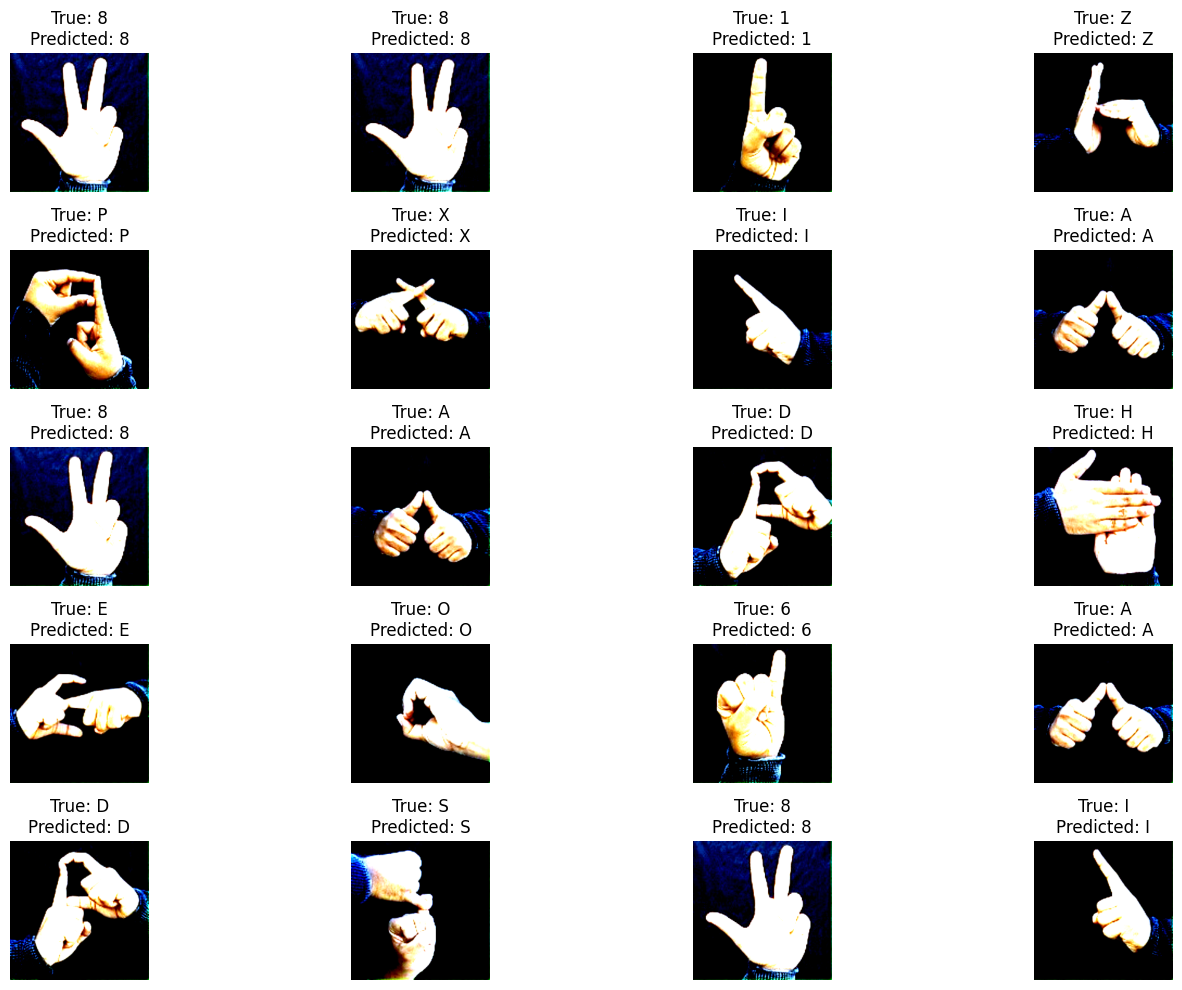

In [25]:
import random
import matplotlib.pyplot as plt

def plot_images_with_predictions(test_dl, efficientnet_model, class_labels, num_rows=3, num_cols=5):
    efficientnet_model.eval()
    
    # Get the underlying DataLoader from the DeviceDataLoader
    underlying_dl = test_dl.dl
    
    # Shuffling the indices of the underlying DataLoader's dataset
    underlying_dl.dataset.dataset.indices = list(range(len(underlying_dl.dataset.dataset)))
    random.shuffle(underlying_dl.dataset.dataset.indices)
    
    iterator = iter(test_dl)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
    for row in range(num_rows):
        for col in range(num_cols):
            try:
                inputs, labels = next(iterator)
            except StopIteration:
                return
            outputs = efficientnet_model(inputs)
            _, predicted = torch.max(outputs, 1)
            img = inputs[0].cpu()
            true_label = class_labels[labels[0]]
            predicted_label = class_labels[predicted[0]]
            axes[row, col].imshow(img.permute(1, 2, 0).clamp(0, 1))
            axes[row, col].set_title(f"True: {true_label}\nPredicted: {predicted_label}")
            axes[row, col].axis('off')
    plt.tight_layout()
    plt.show()

# Usage to visualize predictions on test data:
plot_images_with_predictions(test_dl, efficientnet_model, full_data.classes, num_rows=5, num_cols=4)

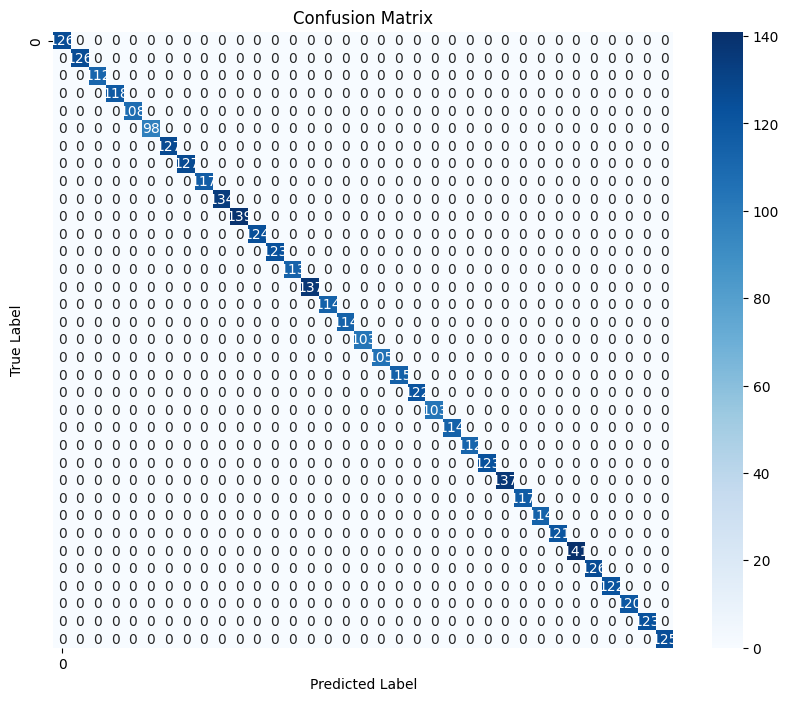

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Put the model in evaluation mode
efficientnet_model.eval()

# Lists to store predictions and true labels
all_predictions = []
all_labels = []

# Iterate over the validation dataset
with torch.no_grad():
    for inputs, labels in valid_dl:
        outputs = efficientnet_model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_num, yticklabels=target_num)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [35]:
!pip install efficientnet_pytorch
from efficientnet_pytorch import EfficientNet

efficientnet_model = EfficientNet.from_pretrained('efficientnet-b0')

num_classes = 35 
efficientnet_model._fc = torch.nn.Linear(efficientnet_model._fc.in_features, num_classes)
efficientnet_model.to(device)
summary(model=efficientnet_model, input_size=(3, 226, 226))

Loaded pretrained weights for efficientnet-b0
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         ZeroPad2d-1          [-1, 3, 227, 227]               0
Conv2dStaticSamePadding-2         [-1, 32, 113, 113]             864
       BatchNorm2d-3         [-1, 32, 113, 113]              64
MemoryEfficientSwish-4         [-1, 32, 113, 113]               0
         ZeroPad2d-5         [-1, 32, 115, 115]               0
Conv2dStaticSamePadding-6         [-1, 32, 113, 113]             288
       BatchNorm2d-7         [-1, 32, 113, 113]              64
MemoryEfficientSwish-8         [-1, 32, 113, 113]               0
          Identity-9             [-1, 32, 1, 1]               0
Conv2dStaticSamePadding-10              [-1, 8, 1, 1]             264
MemoryEfficientSwish-11              [-1, 8, 1, 1]               0
         Identity-12              [-1, 8, 1, 1]               0
Conv2dStaticSamePadding-13        

In [4]:
!pip install pthflops

In [12]:

from pthflops import count_ops

# Create a network and a corresponding input
inp = torch.rand(1,3,226,226).to(device)

# Count the number of FLOPs
count_ops(model, inp)

Operation               OPS         
----------------------  ----------  
conv1                   120130752   
bn1                     1634432     
relu                    1634432     
maxpool                 1663488     
layer1_0_conv1          119771136   
layer1_0_bn1            415872      
layer1_0_relu           415872      
layer1_0_conv2          119771136   
layer1_0_bn2            415872      
add                     415872      
layer1_0_relu_1         415872      
layer1_1                415872      
layer1_2_conv1          119771136   
layer1_2_bn1            415872      
layer1_2_relu           415872      
layer1_2_conv2          119771136   
layer1_2_bn2            415872      
add_1                   415872      
layer1_2_relu_1         415872      
layer1_3                415872      
layer2_0_conv1          62005248    
layer2_0_bn1            215296      
layer2_0_relu           215296      
layer2_0_conv2          124010496   
layer2_0_bn2            215296      
l

(2063993571,
 [['conv1', 120130752],
  ['bn1', 1634432],
  ['relu', 1634432],
  ['maxpool', 1663488],
  ['layer1_0_conv1', 119771136],
  ['layer1_0_bn1', 415872],
  ['layer1_0_relu', 415872],
  ['layer1_0_conv2', 119771136],
  ['layer1_0_bn2', 415872],
  ['add', 415872],
  ['layer1_0_relu_1', 415872],
  ['layer1_1', 415872],
  ['layer1_2_conv1', 119771136],
  ['layer1_2_bn1', 415872],
  ['layer1_2_relu', 415872],
  ['layer1_2_conv2', 119771136],
  ['layer1_2_bn2', 415872],
  ['add_1', 415872],
  ['layer1_2_relu_1', 415872],
  ['layer1_3', 415872],
  ['layer2_0_conv1', 62005248],
  ['layer2_0_bn1', 215296],
  ['layer2_0_relu', 215296],
  ['layer2_0_conv2', 124010496],
  ['layer2_0_bn2', 215296],
  ['layer2_0_downsample_0', 6889472],
  ['layer2_0_downsample_1', 215296],
  ['add_2', 215296],
  ['layer2_0_relu_1', 215296],
  ['layer2_1', 215296],
  ['layer2_2_conv1', 124010496],
  ['layer2_2_bn1', 215296],
  ['layer2_2_relu', 215296],
  ['layer2_2_conv2', 124010496],
  ['layer2_2_bn2', 215

In [5]:
from torchvision.models import shufflenet_v2_x1_0  # Import ShuffleNetV2 model
from pthflops import count_ops

# Create a network and a corresponding input
device = 'cuda:0'
model = shufflenet_v2_x1_0(pretrained=True).to(device)  # Load pretrained ShuffleNetV2 model
inp = torch.rand(1, 3, 226, 226).to(device)

# Count the number of FLOPs
count_ops(model, inp)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to /root/.cache/torch/hub/checkpoints/shufflenetv2_x1-5666bf0f80.pth
100%|██████████| 8.79M/8.79M [00:00<00:00, 78.5MB/s]
/opt/conda/lib/python3.10/site-packages/torch/overrides.py:110: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  torc

TypeError: 'int' object is not subscriptable

While executing %getitem : [num_users=2] = call_function[target=operator.getitem](args = (%size, 0), kwargs = {})
Original traceback:
None